In [1]:
#TOV solver with terminal radius, mass for MANY densities, specific variables, new K, & different γ compatible


center = 0.00

function fun(u,r)
    k = 123; G = 1.0; c = 1.0; M = 1.0
    du = [0.0,0.0]
    γ = 2

    if r <= center
        Rho = (((u[1]/k)^(1/γ))/M) #ρ(P)
        
        du[1] = (-4π*G*r*((c^2)* Rho + 3u[1])*((c^2)* Rho + u[1])) / ((c^2)*((3c^2) - (8π*G*(r^2))*Rho))
    else
        Pressure = (k*u[1]^γ)   #P(ρ)
        dPressure = γ*Pressure/u[1]   #dP/dρ = (k*γ*u[1]^(γ-1))
        
        #print(Pressure, "\n")

        du[1] = -((G*(u[2] + 4π*r^3 *(Pressure/c^2))*(u[1] + (Pressure/c^2))) / (r*(r - (2*G*u[2]/c^2)))) * dPressure^(-1)
        du[2] = (4π*r^2)*u[1]
        return du
    end
end


ρ₀ = collect(10^-5:0.0001:0.004) #0.0034100000000000003, #1.5 
rₜ_array = []
mₜ_array =[]
ρₜ_array = []


for a in ρ₀
    Δr = 0.001; min = 0.00; r₀ = 0.00;rᵢ = 0.00
    u₀ = [a, 0.0]
    uᵢ = u₀    

    duᵢ = fun(uᵢ,rᵢ)

    uᵢ_1array = []
    uᵢ_2array = []
    rᵢ_array = []
    
    j = 1 #counter-variable 


    while uᵢ[1] >= min
        ũᵢ = uᵢ .+ Δr*duᵢ
        #ỹᵢ₊₁ = yᵢ + h * (f(tᵢ, yᵢ)) -----> ~ = \tilde

        if ũᵢ[1] < min
            break
        end
        
        rᵢ = rᵢ .+ Δr
        #tᵢ₊₁ = tᵢ + h
    
  
        dũᵢ = fun(ũᵢ, rᵢ)    
        
    
    
        V = uᵢ .+ (Δr/2)*(duᵢ .+ dũᵢ)
        #yᵢ₊₁ = yᵢ + 1/2h * (f(tᵢ, yᵢ) + f(tᵢ₊₁, ỹᵢ₊₁))
        
        if V[1] < min
            break
        end
        
        uᵢ = V
  
        duᵢ = fun(uᵢ, rᵢ)
 
        push!(uᵢ_1array, uᵢ[1])
        push!(uᵢ_2array, uᵢ[2])
        push!(rᵢ_array, rᵢ)
        
        #print(uᵢ_1array[j],"\t", uᵢ_2array[j], "\t", rᵢ_array[j], "\n")
  
        j += 1
    end

    
    rₜ = rᵢ_array[end - 1] - ((rᵢ[end] - rᵢ_array[end - 1]) * uᵢ_1array[end - 1])/(uᵢ_1array[end] - uᵢ_1array[end - 1])

    print(rₜ, "\t", uᵢ_2array[end], "\t", a, "\n")
    
    push!(rₜ_array, rₜ)
    push!(mₜ_array, uᵢ_2array[end])
    push!(ρₜ_array, a)   
end

13.860489351711824	0.03390163876433294	1.0000000000000003e-5
13.483509265793911	0.3430354904531171	0.00011
13.135599620168794	0.6047769031383365	0.00021
12.81353962288092	0.8274337517783015	0.00031000000000000005
12.514564740999194	1.0176411322226193	0.00041000000000000005
12.236289391764725	1.180740725944265	0.00051
11.976644273404629	1.321064937029128	0.0006100000000000001
11.733826402169786	1.4421520506248178	0.00071
11.506257651356856	1.5469104853931248	0.0008100000000000001
11.292550418357074	1.637745227063491	0.0009100000000000001
11.09148081386914	1.7166564705646556	0.00101
10.901964386233228	1.78531634883564	0.00111
10.723037997379818	1.8451300307546539	0.0012100000000000001
10.553841516570028	1.8972833273177134	0.0013100000000000002
10.393606884240619	1.942782050308035	0.00141
10.241644020593123	1.9824822833302953	0.00151
10.097332508463916	2.0171159179905485	0.00161
9.960112311273084	2.047310766585278	0.0017100000000000001
9.829476900581776	2.0736073658144	0.00181000000000000

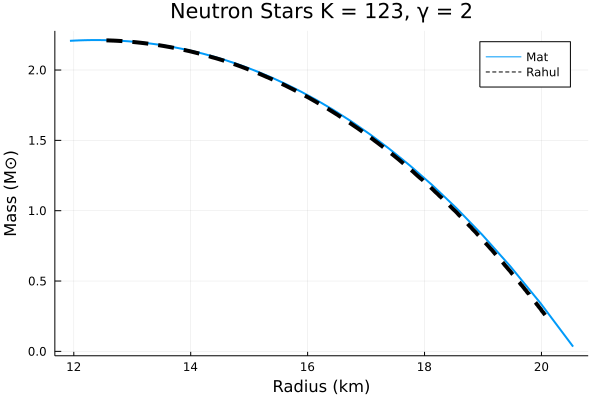

In [2]:
using DelimitedFiles
using Plots

g = readdlm("tov_seq_pwp2.dat")


TMASS = g[4:203]
TRAD = g[207:406]

plot(rₜ_array.*1.482, mₜ_array, xlabel = "Radius (km)", ylabel = "Mass (M⊙)", label = "Mat", title = "Neutron Stars K = 123, γ = 2", linewidth = 2)
plot!(TMASS, TRAD, label = "Rahul", linestyle = :dash, linewidth = 4, color = :black)

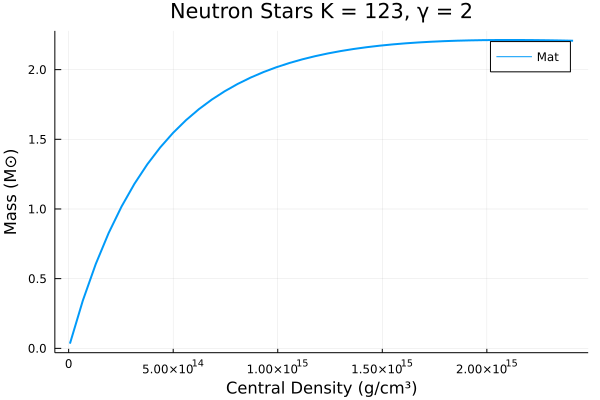

In [3]:
plot(ρ₀.*6.17e17, mₜ_array, xlabel = "Central Density (g/cm³)", ylabel = "Mass (M⊙)", label = "Mat", title = "Neutron Stars K = 123, γ = 2", linewidth = 2)